# Projeto Introdução à Análise de Dados e Estatística

*   Professor: Adiel Filho
*   Grupo:
          Amanda Barbosa Silva
          Bruno Cardoso Dantas

*   Base de Dados

O dataset selecionado foi disponibilizado pelo Dados Recife. Ela traz um recorte dos dados de acidentes com e sem vítimas do trânsito da cidade de Recife no período de 2020 a 2021.  Esses dados são disponibilizado pela CTTU e estão disponíveis no formato csv, agrupado por ano.

*  Slide: https://docs.google.com/presentation/d/1BWUJRlX6SXN-UNPFPMnX43IqkARNR4iIrj3SBCKiyTI/edit#slide=id.g2b389201eee_0_0



# Base de dados



In [ ]:
# Importação

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, StandardScaler

from statsmodels.formula.api import ols

from scipy.stats import kstest, ttest_ind, mannwhitneyu

from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import shapiro

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/UFPE - Ciência de Dados/INTRODUÇÃO À ANÁLISE DE DADOS E ESTATÍSTICA/Dataset/

!ls

/content/drive/MyDrive/UFPE - Ciência de Dados/INTRODUÇÃO À ANÁLISE DE DADOS E ESTATÍSTICA/Dataset
acidentes_2020.csv  acidentes2021.csv


In [ ]:
# Aquisição da base de dados
file_path_20 = "./acidentes_2020.csv"
acidentes2020 = pd.read_csv(file_path_20, encoding='utf-8')
file_path_21 = "./acidentes2021.csv"
acidentes2021 = pd.read_csv(file_path_21, encoding='utf-8')

In [ ]:
acidentes2020.drop(columns=['descricao'], inplace=True)

In [ ]:
acidentesRecife = pd.concat([acidentes2020, acidentes2021], ignore_index=True)

In [ ]:
acidentesRecife.head(3)

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,...,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,...,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN


In [ ]:
acidentesRecife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6472 entries, 0 to 6471
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   data                       6472 non-null   object 
 1   hora                       6472 non-null   object 
 2   natureza_acidente          6471 non-null   object 
 3   situacao                   6471 non-null   object 
 4   bairro                     6433 non-null   object 
 5   endereco                   6455 non-null   object 
 6   numero                     3618 non-null   object 
 7   detalhe_endereco_acidente  2582 non-null   object 
 8   complemento                5814 non-null   object 
 9   bairro_cruzamento          6432 non-null   object 
 10  num_semaforo               1744 non-null   object 
 11  sentido_via                4358 non-null   object 
 12  tipo                       6414 non-null   object 
 13  auto                       5864 non-null   float

In [ ]:
acidentesRecife.isnull().mean()

data                         0.000000
hora                         0.000000
natureza_acidente            0.000155
situacao                     0.000155
bairro                       0.006026
endereco                     0.002627
numero                       0.440977
detalhe_endereco_acidente    0.601051
complemento                  0.101669
bairro_cruzamento            0.006180
num_semaforo                 0.730532
sentido_via                  0.326638
tipo                         0.008962
auto                         0.093943
moto                         0.370828
ciclom                       0.629326
ciclista                     0.608776
pedestre                     0.608313
onibus                       0.556397
caminhao                     0.586681
viatura                      0.621137
outros                       0.622991
vitimas                      0.002163
vitimasfatais                0.629017
acidente_verificado          0.215853
tempo_clima                  0.200711
situacao_sem

In [ ]:
acidentesRecife.select_dtypes('object').nunique()

data                          714
hora                         1361
natureza_acidente               4
situacao                        7
bairro                         92
endereco                      982
numero                       1705
detalhe_endereco_acidente     993
complemento                  5419
bairro_cruzamento              92
num_semaforo                  776
sentido_via                    93
tipo                           26
acidente_verificado             8
tempo_clima                     3
situacao_semaforo               5
sinalizacao                     4
condicao_via                    4
conservacao_via                 4
ponto_controle                  5
situacao_placa                 28
velocidade_max_via             24
mao_direcao                     3
divisao_via1                    8
divisao_via2                    7
divisao_via3                    6
dtype: int64

# Análise Exploratória

<ipython-input-16-7a4f737d37f6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mes', data=acidentesRecife, palette='viridis')
<ipython-input-16-7a4f737d37f6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dia_semana', data=acidentesRecife, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


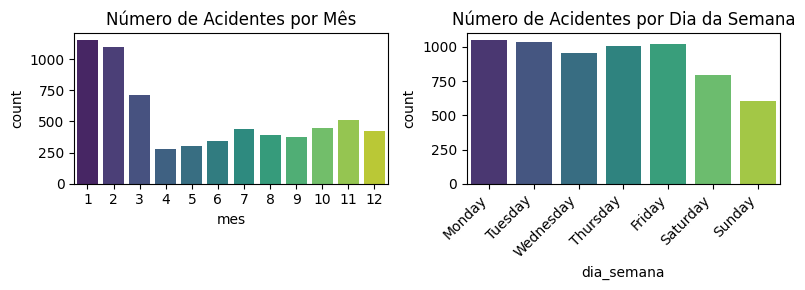

In [ ]:
# Converter a coluna 'data' para o formato de datetime
acidentesRecife['data'] = pd.to_datetime(acidentesRecife['data'])

# Criar colunas para mês e dia da semana
acidentesRecife['mes'] = acidentesRecife['data'].dt.month
acidentesRecife['dia_semana'] = acidentesRecife['data'].dt.day_name()

# Visualização
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.countplot(x='mes', data=acidentesRecife, palette='viridis')
plt.title('Número de Acidentes por Mês')

plt.subplot(1, 2, 2)
sns.countplot(x='dia_semana', data=acidentesRecife, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Número de Acidentes por Dia da Semana')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-17-7f1a1b04c530>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tempo_clima', data=acidentesRecife, palette='muted')


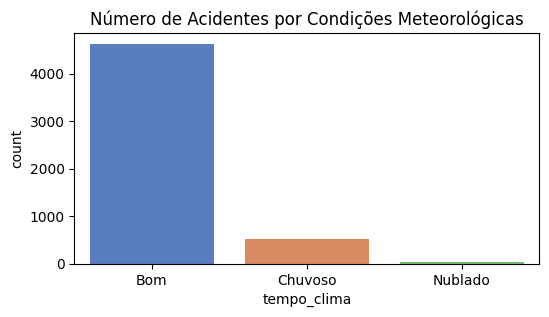

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='tempo_clima', data=acidentesRecife, palette='muted')
plt.title('Número de Acidentes por Condições Meteorológicas')
plt.show()

<ipython-input-18-33c0d773a842>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='natureza_acidente', data=acidentesRecife, palette='deep', order=acidentesRecife['natureza_acidente'].value_counts().index)


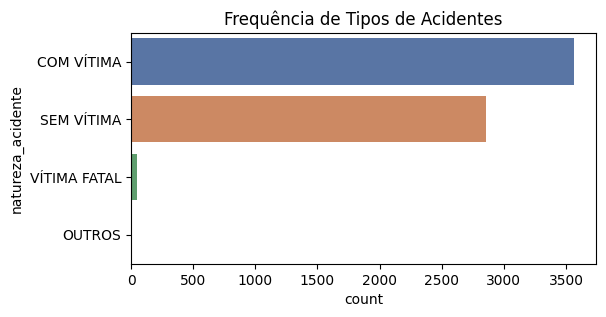

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(y='natureza_acidente', data=acidentesRecife, palette='deep', order=acidentesRecife['natureza_acidente'].value_counts().index)
plt.title('Frequência de Tipos de Acidentes')
plt.show()

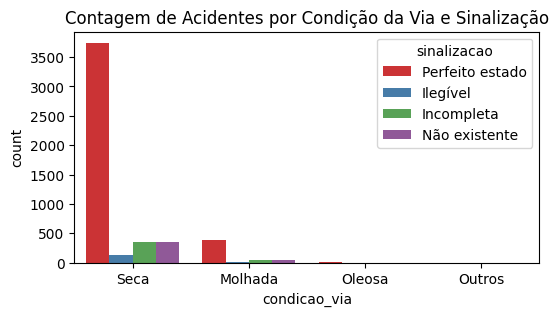

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='condicao_via', hue='sinalizacao', data=acidentesRecife, palette='Set1')
plt.title('Contagem de Acidentes por Condição da Via e Sinalização')
plt.show()

# Testando Hipóteses

### Hipótese 1: A incidência de acidentes varia ao longo do tempo.

*   H0: Não há diferença significativa na média de acidentes entre os dois períodos de tempo.
*   H1: Há uma diferença significativa na média de acidentes entre os dois períodos de tempo.

In [ ]:
# Criar uma variável binária indicando a ocorrência de acidente (1) ou não (0) para cada dia
acidentesRecife['ocorreu_acidente'] = 1

# Agrupar dados por mês
dados_agrupados = acidentesRecife.groupby(acidentesRecife['data'].dt.to_period("M")).agg({'ocorreu_acidente': 'sum'})

# Separar os dados em dois grupos (primeira metade e segunda metade do período)
grupo1 = dados_agrupados.iloc[:len(dados_agrupados)//2]['ocorreu_acidente']
grupo2 = dados_agrupados.iloc[len(dados_agrupados)//2:]['ocorreu_acidente']

# Teste de aderência - Kolmogorov-Smirnov
stat_group1, p_value_group1 = kstest(grupo1, 'norm')
stat_group2, p_value_group2 = kstest(grupo2, 'norm')

# Imprimir os resultados do teste de aderência
print("Teste de Kolmogorov-Smirnov para Grupo 1 - p-valor:", p_value_group1)
print("Teste de Kolmogorov-Smirnov para Grupo 2 - p-valor:", p_value_group2)

# Nível de significância (alpha)
alpha = 0.05

# Tomar uma decisão com base no resultado do teste de aderência
if p_value_group1 < alpha or p_value_group2 < alpha:
    print("Rejeitar a hipótese nula de normalidade")
    print("Os dados não seguem uma distribuição normal. Utilizar teste não paramétrico.")

    # Teste não paramétrico - Mann-Whitney U
    stat_nonparam, p_value_nonparam = mannwhitneyu(grupo1, grupo2)

    # Imprimir os resultados do teste não paramétrico
    print("Teste de Mann-Whitney U - p-valor:", p_value_nonparam)

    # Tomar uma decisão com base no resultado do teste não paramétrico
    if p_value_nonparam < alpha:
        print("Rejeitar a hipótese nula (H0)")
        print("Há evidências de que a média de acidentes varia ao longo do tempo.")
    else:
        print("Não rejeitar a hipótese nula (H0)")
        print("Não há evidências suficientes para concluir que a média de acidentes varia ao longo do tempo.")
else:
    print("Não rejeitar a hipótese nula de normalidade")
    print("Os dados seguem uma distribuição normal. Utilizar teste paramétrico.")

    # Teste paramétrico - Teste t de Student
    stat_param, p_value_param = ttest_ind(grupo1, grupo2)

    # Imprimir os resultados do teste paramétrico
    print("Teste t de Student - p-valor:", p_value_param)

    # Tomar uma decisão com base no resultado do teste paramétrico
    if p_value_param < alpha:
        print("Rejeitar a hipótese nula (H0)")
        print("Há evidências de que a média de acidentes varia ao longo do tempo.")
    else:
        print("Não rejeitar a hipótese nula (H0)")
        print("Não há evidências suficientes para concluir que a média de acidentes varia ao longo do tempo.")


Teste de Kolmogorov-Smirnov para Grupo 1 - p-valor: 0.0
Teste de Kolmogorov-Smirnov para Grupo 2 - p-valor: 0.0
Rejeitar a hipótese nula de normalidade
Os dados não seguem uma distribuição normal. Utilizar teste não paramétrico.
Teste de Mann-Whitney U - p-valor: 0.47048642205878966
Não rejeitar a hipótese nula (H0)
Não há evidências suficientes para concluir que a média de acidentes varia ao longo do tempo.


### Hipótese 2: Condições meteorológicas influenciam a frequência de acidentes.

*   H0: Não há diferença significativa na média de acidentes entre as diferentes condições meteorológicas.
*   H1: Há uma diferença significativa na média de acidentes entre as diferentes condições meteorológicas.

In [ ]:
# Criar um modelo de ANOVA
modelo_anova_2 = ols('ocorreu_acidente ~ tempo_clima', data=acidentesRecife).fit()

# Realizar a análise de variância (ANOVA)
anova_resultado_2 = sm.stats.anova_lm(modelo_anova_2, typ=2)

# Imprimir os resultados da ANOVA
print(anova_resultado_2)

# Interpretar os resultados da ANOVA
alpha_2 = 0.05
p_valor_anova_2 = anova_resultado_2['PR(>F)'][0]

if p_valor_anova_2 < alpha_2:
    print("Rejeitar a hipótese nula (H0)")
    print("Há evidências de que as condições meteorológicas têm impacto significativo na frequência de acidentes.")
else:
    print("Não rejeitar a hipótese nula (H0)")
    print("Não há evidências suficientes para concluir que as condições meteorológicas têm impacto significativo na frequência de acidentes.")

                   sum_sq      df          F        PR(>F)
tempo_clima  5.863458e-27     2.0  19.115267  5.356591e-09
Residual     7.929285e-25  5170.0        NaN           NaN
Rejeitar a hipótese nula (H0)
Há evidências de que as condições meteorológicas têm impacto significativo na frequência de acidentes.


### Hipótese 3: Certos tipos de acidentes são mais comuns do que outros.

*   H0: Não há diferença significativa na média de ocorrência entre os diferentes tipos de acidentes.
*   H1: Há uma diferença significativa na média de ocorrência entre os diferentes tipos de acidentes.

In [ ]:
# Criar modelo de ANOVA
modelo_anova_3 = ols('ocorreu_acidente ~ natureza_acidente', data=acidentesRecife).fit()

# Realizar análise de variância (ANOVA)
anova_resultado_3 = sm.stats.anova_lm(modelo_anova_3, typ=2)

# Imprimir os resultados da ANOVA
print(anova_resultado_3)

# Nível de significância (alpha)
alpha_3 = 0.05

# Tomar uma decisão com base no resultado da ANOVA
p_valor_anova_3 = anova_resultado_3['PR(>F)'][0]

if p_valor_anova_3 < alpha_3:
    print("Rejeitar a hipótese nula (H0)")
    print("Há evidências de que existem diferenças significativas na média de ocorrência entre os diferentes tipos de acidentes.")
else:
    print("Não rejeitar a hipótese nula (H0)")
    print("Não há evidências suficientes para concluir que existem diferenças significativas na média de ocorrência entre os diferentes tipos de acidentes.")

                         sum_sq      df           F        PR(>F)
natureza_acidente  9.895897e-27     3.0  108.877787  9.019613e-69
Residual           1.959284e-25  6467.0         NaN           NaN
Rejeitar a hipótese nula (H0)
Há evidências de que existem diferenças significativas na média de ocorrência entre os diferentes tipos de acidentes.


### Hipótese 4: Condições da via e sinalização afetam a ocorrência de acidentes.

*   H0: Não há diferença significativa na média de acidentes entre diferentes condições da via, conservação e sinalização.
*   H1: Há uma diferença significativa na média de acidentes entre diferentes condições da via, conservação e sinalização.

In [ ]:
# Criar modelo de ANOVA
modelo_anova_4 = ols('ocorreu_acidente ~ condicao_via + conservacao_via + sinalizacao', data=acidentesRecife).fit()

# Realizar análise de variância (ANOVA)
anova_resultado_4 = sm.stats.anova_lm(modelo_anova_4, typ=2)

# Imprimir os resultados da ANOVA
print(anova_resultado_4)

# Nível de significância (alpha)
alpha_4 = 0.05

# Tomar uma decisão com base no resultado da ANOVA
p_valor_anova_4 = anova_resultado_4['PR(>F)'][0]

if p_valor_anova_4 < alpha_4:
    print("Rejeitar a hipótese nula (H0)")
    print("Há evidências de que existem diferenças significativas na média de ocorrência entre diferentes condições da via, conservação e sinalização.")
else:
    print("Não rejeitar a hipótese nula (H0)")
    print("Não há evidências suficientes para concluir que existem diferenças significativas na média de ocorrência entre diferentes condições da via, conservação e sinalização.")

                       sum_sq      df           F         PR(>F)
condicao_via     6.831304e-27     3.0  663.755132   0.000000e+00
conservacao_via  9.796674e-28     3.0   95.188157   6.664312e-60
sinalizacao      3.303510e-27     3.0  320.981364  1.605555e-190
Residual         1.707084e-26  4976.0         NaN            NaN
Rejeitar a hipótese nula (H0)
Há evidências de que existem diferenças significativas na média de ocorrência entre diferentes condições da via, conservação e sinalização.


# Inferências

In [ ]:
# Criar modelo de Regressão Linear
modelo_regressao_h1 = sm.OLS(acidentesRecife['ocorreu_acidente'], sm.add_constant(acidentesRecife['mes'])).fit()

# Imprimir resumo do modelo
print(modelo_regressao_h1.summary())

# Análise de resíduos
residuos_h1 = modelo_regressao_h1.resid

# Avaliação do R^2
r_squared_h1 = modelo_regressao_h1.rsquared
print("R^2:", r_squared_h1)

                            OLS Regression Results                            
Dep. Variable:       ocorreu_acidente   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6470.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               1.00
Time:                        22:02:25   Log-Likelihood:             2.0013e+05
No. Observations:                6472   AIC:                        -4.003e+05
Df Residuals:                    6470   BIC:                        -4.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.95e-16   5.13e+15      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# Converter 'tempo_clima' para categoria
acidentesRecife['tempo_clima'] = acidentesRecife['tempo_clima'].astype('category')

# Converter 'ocorreu_acidente' para numérico, se necessário
acidentesRecife['ocorreu_acidente'] = pd.to_numeric(acidentesRecife['ocorreu_acidente'], errors='coerce')

# Criar modelo de Regressão Linear
modelo_regressao_h2 = sm.OLS(acidentesRecife['ocorreu_acidente'], sm.add_constant(acidentesRecife['tempo_clima'].cat.codes)).fit()

# Imprimir resumo do modelo
print(modelo_regressao_h2.summary())

# Análise de resíduos
residuos_h2 = modelo_regressao_h2.resid
# Implemente aqui análises de resíduos conforme necessário

# Avaliação do R^2
r_squared_h2 = modelo_regressao_h2.rsquared
print("R^2:", r_squared_h2)

                            OLS Regression Results                            
Dep. Variable:       ocorreu_acidente   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6470.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               1.00
Time:                        22:05:48   Log-Likelihood:             2.0141e+05
No. Observations:                6472   AIC:                        -4.028e+05
Df Residuals:                    6470   BIC:                        -4.028e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   9.39e-17   1.07e+16      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# Converter 'natureza_acidente' para categoria
acidentesRecife['natureza_acidente'] = acidentesRecife['natureza_acidente'].astype('category')

# Converter 'ocorreu_acidente' para numérico, se necessário
acidentesRecife['ocorreu_acidente'] = pd.to_numeric(acidentesRecife['ocorreu_acidente'], errors='coerce')

# Criar modelo de Regressão Linear
modelo_regressao_h3 = sm.OLS(acidentesRecife['ocorreu_acidente'], sm.add_constant(acidentesRecife['natureza_acidente'].cat.codes)).fit()

# Imprimir resumo do modelo
print(modelo_regressao_h3.summary())

# Análise de resíduos
residuos_h3 = modelo_regressao_h3.resid

# Avaliação do R^2
r_squared_h3 = modelo_regressao_h3.rsquared
print("R^2:", r_squared_h3)

                            OLS Regression Results                            
Dep. Variable:       ocorreu_acidente   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -6470.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               1.00
Time:                        22:05:52   Log-Likelihood:             2.0165e+05
No. Observations:                6472   AIC:                        -4.033e+05
Df Residuals:                    6470   BIC:                        -4.033e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   1.19e-16    8.4e+15      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# Converter 'ocorreu_acidente' para numérico, se necessário
acidentesRecife['ocorreu_acidente'] = pd.to_numeric(acidentesRecife['ocorreu_acidente'], errors='coerce')

# Converter variáveis categóricas para dummy
dummies = pd.get_dummies(acidentesRecife[['condicao_via', 'conservacao_via', 'sinalizacao']], drop_first=True)

# Adicionar variáveis dummy ao DataFrame original
acidentesRecife = pd.concat([acidentesRecife, dummies], axis=1)

# Criar modelo de Regressão Linear
modelo_regressao_h4 = sm.OLS(acidentesRecife['ocorreu_acidente'], sm.add_constant(acidentesRecife[dummies.columns])).fit()

# Imprimir resumo do modelo
print(modelo_regressao_h4.summary())

# Análise de resíduos
residuos_h4 = modelo_regressao_h4.resid

# Avaliação do R^2
r_squared_h4 = modelo_regressao_h4.rsquared
print("R^2:", r_squared_h4)

                            OLS Regression Results                            
Dep. Variable:       ocorreu_acidente   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -718.0
Date:                Sat, 27 Jan 2024   Prob (F-statistic):               1.00
Time:                        22:05:55   Log-Likelihood:             2.1249e+05
No. Observations:                6472   AIC:                        -4.250e+05
Df Residuals:                    6462   BIC:                        -4.249e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# Conclusão
